<h2>About this Project</h2>
In this project, you will decompose the test loss into the consituent components: bias, variance, and noise, and analyze their behavior.

<h3>Evaluation</h3>

<p><strong>This project must be successfully completed and submitted in order to receive credit for this course. Your score on this project will be included in your final grade calculation.</strong><p>
    
<p>You are expected to write code where you see <em># YOUR CODE HERE</em> within the cells of this notebook. Not all cells will be graded; code input cells followed by cells marked with <em>#Autograder test cell</em> will be graded. Upon submitting your work, the code you write at these designated positions will be assessed using an "autograder" that will run all test cells to assess your code. You will receive feedback from the autograder that will identify any errors in your code. Use this feedback to improve your code if you need to resubmit. Be sure not to change the names of any provided functions, classes, or variables within the existing code cells, as this will interfere with the autograder. Also, remember to execute all code cells sequentially, not just those you’ve edited, to ensure your code runs properly.</p>
    
<p>You can resubmit your work as many times as necessary before the submission deadline. If you experience difficulty or have questions about this exercise, use the Q&A discussion board to engage with your peers or seek assistance from the instructor.<p>

<p>Before starting your work, please review <a href="https://s3.amazonaws.com/ecornell/global/eCornellPlagiarismPolicy.pdf">eCornell's policy regarding plagiarism</a> (the presentation of someone else's work as your own without source credit).</p>

<h3>Submit Code for Autograder Feedback</h3>

<p>Once you have completed your work on this notebook, you will submit your code for autograder review. Follow these steps:</p>

<ol>
  <li><strong>Save your notebook.</strong></li>
  <li><strong>Mark as Completed —</strong> In the blue menu bar along the top of this code exercise window, you’ll see a menu item called <strong>Education</strong>. In the <strong>Education</strong> menu, click <strong>Mark as Completed</strong> to submit your code for autograder/instructor review. This process will take a moment and a progress bar will show you the status of your submission.</li>
	<li><strong>Review your results —</strong> Once your work is marked as complete, the results of the autograder will automatically be presented in a new tab within the code exercise window. You can click on the assessment name in this feedback window to see more details regarding specific feedback/errors in your code submission.</li>
  <li><strong>Repeat, if necessary —</strong> The Jupyter notebook will always remain accessible in the first tabbed window of the exercise. To reattempt the work, you will first need to click <strong>Mark as Uncompleted</strong> in the <strong>Education</strong> menu and then proceed to make edits to the notebook. Once you are ready to resubmit, follow steps one through three. You can repeat this procedure as many times as necessary.</li>
</ol>
<p>You can also download a copy of this notebook in multiple formats using the <strong>Download as</strong> option in the <strong>File</strong> menu above.</p>

## Getting Started

Before you get started, let's import a few packages that you will need.

In [1]:
import numpy as np
from numpy.matlib import repmat
import matplotlib
import matplotlib.pyplot as plt
from helper import *

%matplotlib inline

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.6.8


## Bias-Variance Decomposition

Recall that the generalization error of squared loss can be decomposed into bias, variance, and noise:
$$
\underbrace{\mathbb{E} \left[ \left( h_D(\mathbf{x}) - y \right)^2 \right]}_\text{Generalization Error} = \underbrace{\mathbb{E} \left[ \left( h_D (\mathbf{x}) - \overline{h} (\mathbf{x}) \right)^2 \right]}_\text{Variance} + \underbrace{\mathbb{E} \left[ \left( \overline{h}(\mathbf{x}) - \overline{y}(\mathbf{x}) \right)^2 \right]}_{\text{Bias}^2} + \underbrace{\mathbb{E} \left[ \left( \overline{y}(\mathbf{x}) - y(\mathbf{x}) \right)^2 \right]}_\mathrm{Noise}
$$
    
We will now create a data set for which we can approximately compute this decomposition. Since we cannot calculate the Generalization Error, we will estimate it using the loss on the test set. The function **`toydata`** generates a 2-dimensional binary data set (classes 1 and 2). Both are sampled from Gaussian distributions:
$$
P \left( \mathbf{x} \; | \; y=1 \right) \sim \mathcal{N}( \mathbf{0}, I) \text{ and } P \left( \mathbf{x} \; | \; y=2 \right) \sim \mathcal{N} \left( \mathbf{\mu}, I \right)
$$
where $\mathbf{\mu} = \begin{bmatrix}1.75\\1.75\end{bmatrix}$. In code, we will use the global variable `OFFSET = 1.75` to represent $\mathbf{\mu}$.

### Computing noise, bias and variance

You will implement five functions: **`computeybar`**, **`computenoise`**, **`computehbar`**, **`computebias`**, and **`computevariance`**. The functions `computeybar` and `computehbar` are helper functions to calculate the three components of squared error.

<hr>

`toydata` is a helper function that generates the $n$ 2-dimensional data points with $n/2$ values in class 1 and $n/2$ values in class 2.
- Class 1 is the label for data drawn from a normal distribution with mean $\mathbf{0}$ and standard deviation $\sigma = I$. That is, first dimension is drawn with mean $0$ and std. dev. $1$, and second dimension is independently drawn with mean $0$ and std. dev. $1$.
- Class 2 is the label for data drawn from a normal distribution with mean $\mathbf{\mu}$ and $\sigma = I$. That is, first dimension is drawn with mean $1.75$ and std. dev. $1$, and second dimension is independelty drawn with mean $1.75$ and std. dev. $1$.

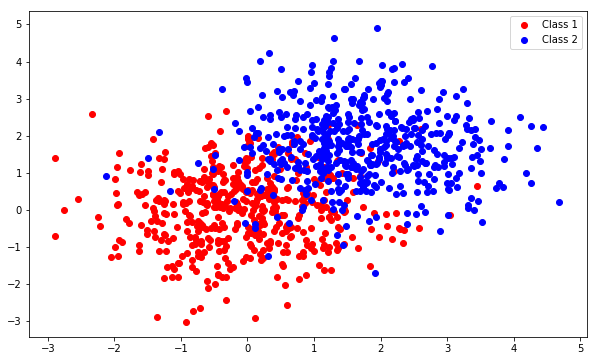

In [2]:
OFFSET = 1.75 # mu = [OFFSET, OFFSET]
X, y = toydata(OFFSET, 1000)

# Visualize the generated data
ind1 = y == 1
ind2 = y == 2
plt.figure(figsize=(10, 6))
plt.scatter(X[ind1, 0], X[ind1, 1], c='r', marker='o', label='Class 1')
plt.scatter(X[ind2, 0], X[ind2, 1], c='b', marker='o', label='Class 2')
plt.legend();

### Part One: Noise [Graded]
You will first implement functions to compute the noise. For this, you need to implement **`computeybar`** to compute the expected label for a given input $\mathbf{x}$:
$$
\overline{y}(\mathbf{x}) = 1 \cdot P \left( y=1 \; | \; \mathbf{x} \right) + 2 \cdot P \left( y=2 \; | \; \mathbf{x} \right)
$$

You can compute the probability $P \left( \mathbf{x} \; | \; y = c \right)$ with the equations $P \left( \mathbf{x} \; | \; y=1 \right) \sim \mathcal{N}(\mathbf{0}, I) \text{ and } P \left( \mathbf{x} \; | \; y=2 \right) \sim \mathcal{N} ( \mathbf{\mu}, I)$. Then use Bayes rule to compute

$$
P \left( y=c \; | \; \mathbf{x} \right) = \frac{ P \left( \mathbf{x} \; | \; y=c \right) \cdot P(y=c) }{ P \left( \mathbf{x} \; | \; y=1 \right) \cdot P(y=1) + P \left( \mathbf{x} \; | \; y=2 \right) \cdot P(y=2)}
$$

**Implementation Notes:**
- Use the function `normpdf` to compute $P \left( [\mathbf{x}]_\alpha \; | \; y = c \right)$, which is defined for you inside `computeybar`. Note that `normpdf` only computes $P \left( [\mathbf{x}]_\alpha \; | \; y = c \right)$ in a single dimension $\alpha$, but you can use the fact that both dimensions are independent to obtain, for example, $P \left( \mathbf{x} \; | \; y=1 \right) = P \left( [\mathbf{x}]_1 \; | \; y=1 \right) \cdot P \left( [\mathbf{x}]_2 \; | \; y=1 \right)$.
- Since `toyData` generated $n/2$ points for both classes, $P(y = c) = 1/2$ for $c = 1, 2$.

In [3]:
def computeybar(xTe, OFFSET):
    """
    Computes the expected label 'ybar' for a set of inputs xTe, 
    generated from two Normal distributions (the first with mean 0 and std. dev. I
    and the second with mean [OFFSET, OFFSET] and std. dev. I).
    
    Input:
        xTe    : data matrix of shape nx2
        OFFSET : The OFFSET passed into the toyData function. The difference in the
                 mu of normal distributions for points with labels class1 and class2.

    Output:
        ybar   : a nx1 vector of the expected labels for each vector in xTe
    """
    n, d = xTe.shape
    ybar = np.zeros(n)
    
    # Feel free to use the following function to compute P( [x]_\alpha | y )
    normpdf = lambda x, mu, sigma: np.exp(-0.5 * np.power((x - mu) / sigma, 2)) / (np.sqrt(2 * np.pi) * sigma)
    
    # a = p(x|y=1) = p(x_1|y=1) * p(x_2|y=1) = normpdf(x_1,0,1) * normpdf(x_2,0,1)
    # b = p(x|y=2) = p(x_1|y=2) * p(x_2|y=2) = normpdf(x_1,OFFSET,1) * normpdf(x_2,OFFSET,1)
    # x_1 and x_2 will be vertical slices of xTe
    x_1 = xTe[:,:1]
    x_2 = xTe[:,1:]
    a = np.multiply(normpdf(x_1,0,1),normpdf(x_2,0,1))
    b = np.multiply(normpdf(x_1,OFFSET,1),normpdf(x_2,OFFSET,1))
    denom = a+b
    
    # c = p(y=1) = 1/2 = p(y=2)
    # d = p(y=2) = 1/2
    
    # e = p(y=1|x) = a*c/(a*c+b*d) = a*c/(a*c+b*c) = a/(a+b)
    # f = p(y=2|x) = b*d/(a*c+b*d) = b*c/(a*c+b*c) = b/(a+b)
    # use np.divide here
    e = np.divide(a,denom)
    f = np.divide(b,denom)
    
    # g = y_bar(x) = 1*e+2*f
    g = 1*e + 2*f
    return g.flatten()
    

In [4]:
OFFSET = 50
    # Create an easy dataset
    # We set sigma=1 and since the mean is far apart,
    # the noise is negligible
xTe = np.array([
        [49.308783, 49.620651], 
        [1.705462, 1.885418], 
        [ 51.192402, 50.256330],
        [0.205998, -0.089885],
        [50.853083, 51.833237]])  
yTe = np.array([2, 1, 2, 1, 2])
    
ybar = computeybar(xTe, OFFSET)
print(ybar)

[2. 1. 2. 1. 2.]


In [5]:
xTe = np.array([
        [49.308783, 49.620651], 
        [1.705462, 1.885418], 
        [ 51.192402, 50.256330],
        [0.205998, -0.089885],
        [50.853083, 51.833237]])
print(xTe[:,:1])
print(xTe[:,1:])

[[49.308783]
 [ 1.705462]
 [51.192402]
 [ 0.205998]
 [50.853083]]
[[49.620651]
 [ 1.885418]
 [50.25633 ]
 [-0.089885]
 [51.833237]]


In [6]:
def test_ybar1():
    OFFSET = 2
    n = 1000
    xTe, yTe = toydata(OFFSET, n) # Generate n datapoints
    ybar = computeybar(xTe, OFFSET)
    
    return ybar.shape == (n, ) # the output of your ybar should be a n dimensional array

def test_ybar2():
    OFFSET = 50
    # Create an easy dataset
    # We set sigma=1 and since the mean is far apart,
    # the noise is negligible
    xTe = np.array([
        [49.308783, 49.620651], 
        [1.705462, 1.885418], 
        [ 51.192402, 50.256330],
        [0.205998, -0.089885],
        [50.853083, 51.833237]])  
    yTe = np.array([2, 1, 2, 1, 2])
    
    ybar = computeybar(xTe, OFFSET)
    return np.isclose(np.mean(np.power(yTe - ybar, 2)), 0)

def test_ybar3():
    OFFSET = 3;

    xTe = np.array([
        [0.45864, 0.71552],
        [2.44662, 1.68167],
        [1.00345, 0.15182],
        [-0.10560, -0.48155],
        [3.07264, 3.81535],
        [3.13035, 2.72151],
        [2.25265, 3.78697]])
    yTe = np.array([1, 2, 1, 1, 2, 2, 2])
    
    ybar = computeybar(xTe, OFFSET)
    
    return np.mean(np.power(yTe - ybar, 2)) < 0.0002 # make sure the noise is small

runtest(test_ybar1, 'test_ybar1')
runtest(test_ybar2, 'test_ybar2')
runtest(test_ybar3, 'test_ybar3')

Running Test: test_ybar1 ... ✔ Passed!
Running Test: test_ybar2 ... ✔ Passed!
Running Test: test_ybar3 ... ✔ Passed!


In [7]:
# Autograder test cell - worth 1 point
# runs test_ybar1

In [8]:
# Autograder test cell - worth 1 point
# runs test_ybar2

In [9]:
# Autograder test cell - worth 1 point
# runs test_ybar3

### Part Two: Noise continued [Graded]

Now, calculate the noise component $\mathbb{E} \left[ \left( \overline{y}(\mathbf{x}) - y(\mathbf{x}) \right)^2 \right]$ of the error using `computeybar` that you implemented above. Remember that

$$
\mathbb{E} \left[ \left( \overline{y}(\mathbf{x}) - y(\mathbf{x}) \right)^2 \right] \approx \frac{1}{n} \sum_{i=1}^n \left( \overline{y} \left( \mathbf{x}_i \right) - y \left( \mathbf{x}_i \right) \right)^2
$$

and that `computeybar` computes $\overline{y}(\mathbf{x}) = \left[ \overline{y} \left( \mathbf{x}_1 \right), \dots, \overline{y} \left( \mathbf{x}_n \right) \right]^\top$.

In [10]:
def computenoise(xTe, yTe, OFFSET):
    """
    Computes the noise, or square mean of ybar - y, for a set of inputs (xTe, yTe) generated with toyData
    using OFFSET.

    Input:
        xTe       : data matrix of shape nx2
        yTe       : n-dimensional array of true labels
        OFFSET    : The OFFSET passed into the toyData function. The difference in the
                    mu of normal distributions for points with labels class1 and class2.

    Output:
        noise:    : a scalar representing the noise component of the error of xTe
    """
    noise = 0
    
    # use my computeybar function to find ybar
    ybar = computeybar(xTe,OFFSET)
    # subtract ybar labels and true labels, square the differences, and find the average value
    return np.mean(np.power(yTe - ybar, 2))

In [11]:
def test_noise1():
    OFFSET = 2
    n = 1000
    xTe, yTe = toydata(OFFSET, n) # Generate n datapoints
    noise = computenoise(xTe, yTe, OFFSET)
    
    return np.isscalar(noise) 

def test_noise2():
    OFFSET = 50
    # Create an easy dataset
    # We set sigma=1 and since the mean is far apart,
    # the noise is negligible
    xTe = np.array([
        [49.308783, 49.620651], 
        [1.705462, 1.885418], 
        [ 51.192402, 50.256330],
        [0.205998, -0.089885],
        [50.853083, 51.833237]])  
    yTe = np.array([2, 1, 2, 1, 2])
    noise = computenoise(xTe, yTe, OFFSET)
    return np.isclose(noise,0)

def test_noise3():
    OFFSET = 3;

    xTe = np.array([
        [0.45864, 0.71552],
        [2.44662, 1.68167],
        [1.00345, 0.15182],
        [-0.10560, -0.48155],
        [3.07264, 3.81535],
        [3.13035, 2.72151],
        [2.25265, 3.78697]])
    yTe = np.array([1, 2, 1, 1, 2, 2, 2])
    
    ybar = computeybar(xTe, OFFSET)
    noise = computenoise(xTe,yTe,OFFSET)
    
    return noise < 0.0002 # make sure the noise is small

runtest(test_noise1, 'test_noise1')
runtest(test_noise2, 'test_noise2')
runtest(test_noise3, 'test_noise3')

Running Test: test_noise1 ... ✔ Passed!
Running Test: test_noise2 ... ✔ Passed!
Running Test: test_noise3 ... ✔ Passed!


In [12]:
# Autograder test cell - worth 1 point
# runs test_noise1

In [13]:
# Autograder test cell - worth 1 point
# runs test_noise2

In [14]:
# Autograder test cell - worth 1 point
# runs test_noise3

<h3>Visualizing the Data</h3>
<p>You can now see the error of the bayes classifier. Below is a plot of the two classes of points and the misclassified points.</p>

Error of Bayes classifier: 10.60%.
Noise: 0.0755


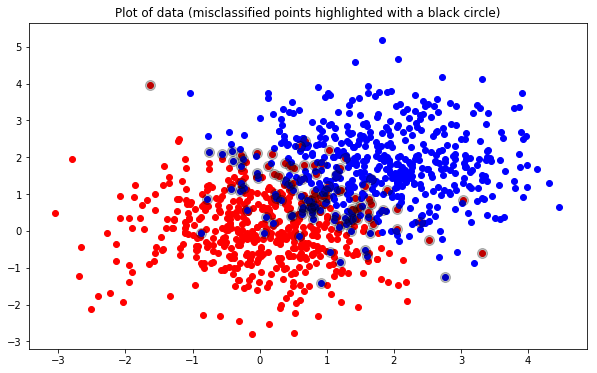

In [15]:
OFFSET = 1.75
np.random.seed(1)
xTe, yTe = toydata(OFFSET, 1000)

# compute Bayes Error
ybar = computeybar(xTe, OFFSET)
predictions = np.round(ybar)
errors = predictions != yTe
err = errors.sum() / len(yTe) * 100
print('Error of Bayes classifier: %.2f%%.' % err)

# print out the noise
print('Noise: %.4f' % computenoise(xTe, yTe, OFFSET))

# plot data
ind1 = yTe == 1
ind2 = yTe == 2
plt.figure(figsize=(10,6))
plt.scatter(xTe[ind1, 0], xTe[ind1, 1], c='r', marker='o')
plt.scatter(xTe[ind2, 0], xTe[ind2, 1], c='b', marker='o')
plt.scatter(xTe[errors, 0], xTe[errors, 1], c='k', s=100, alpha=0.25)
plt.title("Plot of data (misclassified points highlighted with a black circle)")
plt.show()

As you can see from the graph above, the dataset is noisy and cannot be classified into two groups cleanly, thus giving non-zero noise and non-zero bayes error!

### Part Three: Bias [Graded]

For the bias, you will need the average classifier $\overline{h}$. Although you cannot compute the expected value $\overline{h} = \mathbb{E}[h]$, you can approximate it by sampling many training sets $D_1, \dots, D_m$, and training a classifier on each to get $h_{D_1}, \dots, h_{D_m}$. You can then average their predictions on each data point:

$$
\overline{h}(\mathbf{x}) \approx \frac{1}{m} \sum_{j=1}^m h_{D_j}(\mathbf{x})
$$
    
Edit the function **`computehbar`** to do this. You should average over `NMODELS` ($m$) different $h_{D_j}$, each trained on a different data set of `Nsmall` ($n$) inputs drawn from the same distribution. You essentially need to create `NMODELS` toy datasets of size `Nsmall` using `toydata(OFFSET, Nsmall)` and evaluate the trained classifier on `xTe`.

We are going to use regression trees as our $h_{D_j}$ . The following code shows how to instantiate a decision tree:

In [16]:
xTr, yTr = toydata(OFFSET, 100)

# Create a regression tree with no restriction on its depth
# if you want to create a tree of depth k
# then call RegressionTree(depth=k)
tree = RegressionTree(depth=np.inf)

# To fit/train the regression tree
tree.fit(xTr, yTr)

# To use the trained regression tree to make prediction
pred = tree.predict(xTr)

In [17]:
def computehbar(xTe, depth, Nsmall, NMODELS, OFFSET):
    """
    Computes the prediction of the average regression tree (hbar) on dataset xTe.
    Each of the NMODELS regression trees used in the average tree should be
    trained using data from toydata(OFFSET, Nsmall).

    Input:
        xTe       : data matrix of shape nx2
        depth     : Depth of each regression tree to be trained
        Nsmall    : Number of points in the dataset that each tree is trained on
        NMODELS   : Number of regression trees to train
        OFFSET    : The OFFSET passed into the toyData function. The difference in the
                    mu of normal distributions for points with labels class1 and class2.
    Output:
        hbar      : a nx1 vector of the expected labels for each vector in xTe
    """
    n = xTe.shape[0]
    hbar = np.zeros(n)
    preds = np.zeros((n,NMODELS))

    # For each tree
    for i in range(NMODELS):
        # Generate xTr and yTr using toydata()
        xTr, yTr = toydata(OFFSET, Nsmall)
        
        # Initialize a regression tree of the given depth
        tree = RegressionTree(depth)
        
        # Fit the tree to xTr and yTr
        tree.fit(xTr, yTr)
        
        # Predict labels for test inputs xTe using regression tree
        pred = tree.predict(xTe)
        #print(pred)
        
        # Add predictions for xTe to list of predictions (horizonally stack)
        preds[:,i] = pred
        
    # Return average predictions for each test point in xTe across all predictions
    # print(preds)
    # print(np.mean(preds,axis=1))
    return np.mean(preds,axis=1)

In [18]:
preds = np.zeros((5,10))
print(preds)
print(preds[:,0])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0. 0. 0. 0. 0.]


In [19]:
OFFSET = 50
# Create an easy dataset
# We set sigma=1 and since the mean is far apart,
# the noise is negligible
xTe = np.array([
        [49.308783, 49.620651], 
        [1.705462, 1.885418], 
        [51.192402, 50.256330],
        [0.205998, -0.089885],
        [50.853083, 51.833237]])  
yTe = np.array([2, 1, 2, 1, 2])
    
depth = 2
Nsmall = 10
NMODELS = 2
    
# since the mean is far apart, the tree should be able to learn perfectly
hbar = computehbar(xTe, depth, Nsmall, NMODELS, OFFSET) 
ybar = computeybar_grader(xTe, OFFSET)
#bias = np.mean(np.power(hbar-ybar,2))
#print(np.isclose(bias, 0)) # the bias should be close to zero

In [20]:
def test_hbar1():
    OFFSET = 2
    depth = 2
    Nsmall = 10
    NMODELS = 10 
    n = 1000
    xTe, yTe = toydata(OFFSET, n)
    hbar = computehbar(xTe, depth, Nsmall, NMODELS, OFFSET)
    return hbar.shape == (n, ) # the dimension of hbar should be (n, )

def test_hbar2():
    OFFSET = 50
    # Create an easy dataset
    # We set sigma=1 and since the mean is far apart,
    # the noise is negligible
    xTe = np.array([
        [49.308783, 49.620651], 
        [1.705462, 1.885418], 
        [51.192402, 50.256330],
        [0.205998, -0.089885],
        [50.853083, 51.833237]])  
    yTe = np.array([2, 1, 2, 1, 2])
    
    depth = 2
    Nsmall = 10
    NMODELS = 1
    
    # since the mean is far apart, the tree should be able to learn perfectly
    hbar = computehbar(xTe, depth, Nsmall, NMODELS, OFFSET) 
    ybar = computeybar_grader(xTe, OFFSET)
    bias = np.mean(np.power(hbar-ybar,2))
    return np.isclose(bias, 0) # the bias should be close to zero

def test_hbar3():
    OFFSET = 3;

    xTe = np.array([
        [0.45864, 0.71552],
        [2.44662, 1.68167],
        [1.00345, 0.15182],
        [-0.10560, -0.48155],
        [3.07264, 3.81535],
        [3.13035, 2.72151],
        [2.25265, 3.78697]])
    yTe = np.array([1, 2, 1, 1, 2, 2, 2])
    
    depth = 3
    Nsmall = 10
    NMODELS = 100
    
    # set the random seed to ensure consistent behavior
    np.random.seed(1)
    hbar = computehbar(xTe, depth, Nsmall, NMODELS, OFFSET) 
    ybar = computeybar_grader(xTe, OFFSET)
    bias = np.mean(np.power(hbar-ybar, 2))
    return np.abs(bias - 0.0017) < 0.001 # the bias should be close to 0.007

runtest(test_hbar1, 'test_hbar1')
runtest(test_hbar2, 'test_hbar2')
runtest(test_hbar3, 'test_hbar3')

Running Test: test_hbar1 ... ✔ Passed!
Running Test: test_hbar2 ... ✔ Passed!
Running Test: test_hbar3 ... ✔ Passed!


In [21]:
# Autograder test cell - worth 1 point
# runs test_hbar1

In [22]:
# Autograder test cell - worth 1 point
# runs test_hbar2

In [23]:
# Autograder test cell - worth 1 point
# runs test_hbar3

### Part Four: Bias Continued [Graded]

Now we're equipped to calculate the bias $\mathbb{E} \left[ \left( \overline{h}(\mathbf{x}) - \overline{y}(\mathbf{x}) \right)^2 \right]$. In this case, you need to compute the mean of the squared difference over your input points:

$$
\mathbb{E} \left[ \left( \overline{h}(\mathbf{x}) - \overline{y}(\mathbf{x}) \right)^2 \right] \approx \frac{1}{n} \sum_{i=1}^n \left( \bar{h} \left( \mathbf{x}_i \right) - \overline{y} \left( \mathbf{x}_i \right) \right)^2
$$

You can call both `computehbar` and `computeybar` to calculate the bias.

In [39]:
def computebias(xTe, depth, Nsmall, NMODELS, OFFSET):
    """
    Computes the bias for data set xTe. 
    Each of the NMODELS regression trees used in the average tree should be
    trained using data from toydata(OFFSET, Nsmall).

    Input:
        xTe       : data matrix of shape nx2
        depth     : Depth of each regression tree to be trained
        Nsmall    : Number of points in the dataset that each tree is trained on
        NMODELS   : Number of regression trees to train
        OFFSET    : The OFFSET passed into the toyData function. The difference in the
                    mu of normal distributions for points with labels class1 and class2.
    
    Output:
        bias      : a scalar representing the bias component of the error of xTe
    """
    bias = 0
    np.random.seed(1)
    ybar = computeybar(xTe, OFFSET)
    hbar = computehbar(xTe, depth, Nsmall, NMODELS, OFFSET) 
    
    # subtract ybar and hbar, square the differences, and find the average value
    return np.mean(np.power(hbar - ybar, 2))

In [40]:
OFFSET = 3;

xTe = np.array([
        [0.45864, 0.71552],
        [2.44662, 1.68167],
        [1.00345, 0.15182],
        [-0.10560, -0.48155],
        [3.07264, 3.81535],
        [3.13035, 2.72151],
        [2.25265, 3.78697]])
yTe = np.array([1, 2, 1, 1, 2, 2, 2])
    
depth = 3
Nsmall = 10
NMODELS = 100
    
# set the random seed to ensure consistent behavior
bias = computebias(xTe, depth, Nsmall, NMODELS, OFFSET)
print(bias) # the bias should be close to 0.007

0.0017962180645479057


In [41]:
def test_bias1():
    OFFSET = 2
    depth = 2
    Nsmall = 10
    NMODELS = 10 
    n = 1000
    xTe, yTe = toydata(OFFSET, n)
    bias = computebias(xTe, depth, Nsmall, NMODELS, OFFSET)
    return np.isscalar(bias) # the dimension of hbar should be (n, )

def test_bias2():
    OFFSET = 50
    # Create an easy dataset
    # We set sigma=1 and since the mean is far apart,
    # the noise is negligible
    xTe = np.array([
        [49.308783, 49.620651], 
        [1.705462, 1.885418], 
        [51.192402, 50.256330],
        [0.205998, -0.089885],
        [50.853083, 51.833237]])  
    yTe = np.array([2, 1, 2, 1, 2])
    
    depth = 2
    Nsmall = 10
    NMODELS = 1
    
    # since the mean is far apart, the tree should be able to learn perfectly
    bias = computebias(xTe, depth, Nsmall, NMODELS, OFFSET)
    return np.isclose(bias, 0) # the bias should be close to zero

def test_bias3():
    OFFSET = 3;

    xTe = np.array([
        [0.45864, 0.71552],
        [2.44662, 1.68167],
        [1.00345, 0.15182],
        [-0.10560, -0.48155],
        [3.07264, 3.81535],
        [3.13035, 2.72151],
        [2.25265, 3.78697]])
    yTe = np.array([1, 2, 1, 1, 2, 2, 2])
    
    depth = 3
    Nsmall = 10
    NMODELS = 100
    
    # set the random seed to ensure consistent behavior
    bias = computebias(xTe, depth, Nsmall, NMODELS, OFFSET)
    return np.abs(bias - 0.0017) < 0.001 # the bias should be close to 0.007

runtest(test_bias1, 'test_bias1')
runtest(test_bias2, 'test_bias2')
runtest(test_bias3, 'test_bias3')

Running Test: test_bias1 ... ✔ Passed!
Running Test: test_bias2 ... ✔ Passed!
Running Test: test_bias3 ... ✔ Passed!


In [ ]:
# Autograder test cell - worth 1 point
# runs test_bias1

In [ ]:
# Autograder test cell - worth 1 point
# runs test_bias2

In [ ]:
# Autograder test cell - worth 1 point
# runs test_bias3

### Part Five: Variance [Graded]

Finally, to compute the variance, you need to compute the term $\mathbb{E} \left[ \left( h_D (\mathbf{x}) - \overline{h}(\mathbf{x}) \right)^2 \right]$ in **`computevariance`**.

The variance term is an expectation over $D$ and $\mathbf{x}$ and we can take a two-step approach. First, we fix $\mathbf{x}_i$ and calculate $\overline{v} \left( \mathbf{x}_i \right) = \mathbb{E}_D \left[ \left( h_D \left( \mathbf{x}_i \right) - \overline{h} \left( \mathbf{x}_i \right) \right)^2 \right]$ for each $\mathbf{x}_i$. Once again, you cannot compute the expected value exactly, but you can approximate this term by averaging over $m$ (`NMODELS`) models. You can use your implementation of `computehbar` to compute $\overline{h}$, and then estimate

$$
\overline{v} \left( \mathbf{x}_i \right) = \mathbb{E}_D \left[ \left( h_D \left( \mathbf{x}_i \right) - \overline{h} \left( \mathbf{x}_i \right) \right)^2 \right] \approx \frac{1}{m} \sum_{j=1}^m \left( h_{D_j} \left( \mathbf{x}_i \right) - \overline{h} \left( \mathbf{x}_i \right) \right)^2
$$
where once again $D_1, \dots, D_m$ are i.i.d. training data sets of size $n$ (`Nsmall`). Note that the output of this function is a $n$-dimensional vector; in other words, you should not be taking an average over the $n$ input points.

Finally, you will need to return the variance itself, which is

$$
\mathbb{E} \left[ \left( h_D (\mathbf{x}) - \overline{h}(\mathbf{x}) \right)^2 \right] = \mathbb{E}_\mathbf{x} \left[ \overline{v}(\mathbf{x}) \right] \approx \frac{1}{n} \sum_{i=1}^n \overline{v} \left( \mathbf{x}_i \right)
$$

In [44]:
def computevariance(xTe, depth, hbar, Nsmall, NMODELS, OFFSET):
    """
    Computes the variance of classifiers trained on data sets from toydata(OFFSET, Nsmall). 
    The prediction of the average classifier is assumed to be stored in "hbar".

    Input:
        xTe       : data matrix of shape nx2
        depth     : Depth of each regression tree to be trained
        hbar      : nx1 vector of the predictions of hbar on the inputs xTe
        Nsmall    : Number of points in the dataset that each tree is trained on
        NMODELS   : Number of regression trees to train
        OFFSET    : The OFFSET passed into the toyData function. The difference in the
                    mu of normal distributions for points with labels class1 and class2.
    
    Output:
        variance  : a scalar representing the bias component of the error of xTe
    """
    n = xTe.shape[0]
    
    vbars = np.zeros((n,NMODELS))

    # For each tree
    for i in range(NMODELS):
        # Generate xTr and yTr using toydata()
        xTr, yTr = toydata(OFFSET, Nsmall)
        
        # Initialize a regression tree of the given depth
        tree = RegressionTree(depth)
        
        # Fit the tree to xTr and yTr
        tree.fit(xTr, yTr)
        
        # Predict labels for test inputs xTe using regression tree
        pred = tree.predict(xTe)
        vbars[:,i] = np.power(pred-hbar,2)
    vbar = np.mean(vbars,axis=1) 
    return np.mean(vbar)

In [45]:
def test_variance1():
    OFFSET = 2
    depth = 2
    Nsmall = 10
    NMODELS = 10 
    n = 1000
    xTe, yTe = toydata(OFFSET, n)
    hbar = computehbar_grader(xTe, depth, Nsmall, NMODELS, OFFSET)
    var = computevariance(xTe, depth, hbar, Nsmall, NMODELS, OFFSET)
    return np.isscalar(var) # variance should be a scalar

def test_variance2():
    OFFSET = 50
    # Create an easy dataset
    # We set sigma=1 and since the mean is far apart,
    # the noise is negligible
    xTe = np.array([
        [49.308783, 49.620651], 
        [1.705462, 1.885418], 
        [51.192402, 50.256330],
        [0.205998, -0.089885],
        [50.853083, 51.833237]])  
    yTe = np.array([2, 1, 2, 1, 2])
    
    depth = 2
    Nsmall = 10
    NMODELS = 10
    
    # since the noise is negligible, the tree should be able to learn perfectly
    hbar = computehbar_grader(xTe, depth, Nsmall, NMODELS, OFFSET) 
    var = computevariance(xTe, depth, hbar, Nsmall, NMODELS, OFFSET)
    return np.isclose(var, 0) # the bias should be close to zero

def test_variance3():
    OFFSET = 3;

    xTe = np.array([
        [0.45864, 0.71552],
        [2.44662, 1.68167],
        [1.00345, 0.15182],
        [-0.10560, -0.48155],
        [3.07264, 3.81535],
        [3.13035, 2.72151],
        [2.25265, 3.78697]])
    yTe = np.array([1, 2, 1, 1, 2, 2, 2])
    
    depth = 3
    Nsmall = 10
    NMODELS = 100
    
    # set the random seed to ensure consistent behavior
    np.random.seed(1)
    # since the noise is negligible, the tree should be able to learn perfectly
    hbar = computehbar_grader(xTe, depth, Nsmall, NMODELS, OFFSET) 
    var = computevariance(xTe, depth, hbar, Nsmall, NMODELS, OFFSET)
    return np.abs(var - 0.0404) < 0.0015 # the variance should be close to 0.0404

runtest(test_variance1, 'test_variance1')
runtest(test_variance2, 'test_variance2')
runtest(test_variance3, 'test_variance3')

Running Test: test_variance1 ... ✔ Passed!
Running Test: test_variance2 ... ✔ Passed!
Running Test: test_variance3 ... ✔ Passed!


In [46]:
# Autograder test cell - worth 1 point
# runs test_variance1

In [47]:
# Autograder test cell - worth 1 point
# runs test_variance2

In [48]:
# Autograder test cell - worth 1 point
# runs test_variance3

<h3>Review the Error for Various Depths</h3>

<p>If you did everything in the three previous graded sections correctly and execute the following cell, you should see how the error decomposes (roughly) into bias, variance and noise for various depths.</p>

In [49]:
# biasvariancedemo

OFFSET = 1.75
# how big is the training set size N
Nsmall = 75
# how big is a really big data set (approx. infinity)
Nbig = 7500
# how many models do you want to average over
NMODELS = 100
# What regularization constants to evaluate
depths = [0, 1, 2, 3, 4, 5, 6, np.inf]

# we store
Ndepths = len(depths)
lbias = np.zeros(Ndepths)
lvariance = np.zeros(Ndepths)
ltotal = np.zeros(Ndepths)
lnoise = np.zeros(Ndepths)
lsum = np.zeros(Ndepths)

# Different regularization constant classifiers
for i in range(Ndepths):
    depth = depths[i]
    # use this data set as an approximation of the true test set
    xTe,yTe = toydata(OFFSET, Nbig)
    
    # Estimate AVERAGE ERROR (TOTAL)
    total = 0
    for j in range(NMODELS):
        # Set the seed for consistent behavior
        xTr2,yTr2 = toydata(OFFSET, Nsmall)
        model = RegressionTree(depth=depth)
        model.fit(xTr2, yTr2)
        total += np.mean((model.predict(xTe) - yTe) ** 2)
    total /= NMODELS
    
    # Estimate Noise
    noise = computenoise(xTe, yTe, OFFSET)
    
    # Estimate Bias
    bias = computebias(xTe,depth,Nsmall, NMODELS, OFFSET)
    
    # Estimating VARIANCE
    hbar = computehbar(xTe, depth, Nsmall, NMODELS, OFFSET)
    variance = computevariance(xTe, depth, hbar, Nsmall, NMODELS, OFFSET)
    
    # print and store results
    lbias[i] = bias
    lvariance[i] = variance
    ltotal[i] = total
    lnoise[i] = noise
    lsum[i] = lbias[i]+lvariance[i]+lnoise[i]
    
    if np.isinf(depths[i]):
        print('Depth infinite: Bias: %2.4f Variance: %2.4f Noise: %2.4f Bias+Variance+Noise: %2.4f Test error: %2.4f'
          % (lbias[i],lvariance[i],lnoise[i],lsum[i],ltotal[i]))
    else:
        print('Depth: %d: Bias: %2.4f Variance: %2.4f Noise: %2.4f Bias+Variance+Noise: %2.4f Test error: %2.4f'
          % (depths[i],lbias[i],lvariance[i],lnoise[i],lsum[i],ltotal[i]))
        

Depth: 0: Bias: 0.1716 Variance: 0.0000 Noise: 0.0764 Bias+Variance+Noise: 0.2480 Test error: 0.2500
Depth: 1: Bias: 0.0297 Variance: 0.0559 Noise: 0.0801 Bias+Variance+Noise: 0.1657 Test error: 0.1625
Depth: 2: Bias: 0.0050 Variance: 0.0402 Noise: 0.0801 Bias+Variance+Noise: 0.1252 Test error: 0.1257
Depth: 3: Bias: 0.0034 Variance: 0.0449 Noise: 0.0801 Bias+Variance+Noise: 0.1284 Test error: 0.1269
Depth: 4: Bias: 0.0025 Variance: 0.0658 Noise: 0.0801 Bias+Variance+Noise: 0.1484 Test error: 0.1489
Depth: 5: Bias: 0.0027 Variance: 0.0758 Noise: 0.0801 Bias+Variance+Noise: 0.1585 Test error: 0.1593
Depth: 6: Bias: 0.0027 Variance: 0.0818 Noise: 0.0801 Bias+Variance+Noise: 0.1646 Test error: 0.1656
Depth infinite: Bias: 0.0027 Variance: 0.0862 Noise: 0.0801 Bias+Variance+Noise: 0.1690 Test error: 0.1699


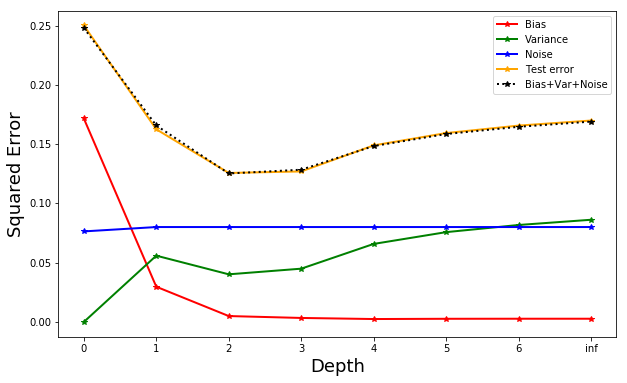

In [50]:
# plot results
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(lbias[:Ndepths], '*', c='r',linestyle='-',linewidth=2)
plt.plot(lvariance[:Ndepths], '*', c='g', linestyle='-',linewidth=2)
plt.plot(lnoise[:Ndepths], '*', c='b',linestyle='-',linewidth=2)
plt.plot(ltotal[:Ndepths], '*', c='orange', linestyle='-',linewidth=2)
plt.plot(lsum[:Ndepths], '*', c='k', linestyle='dotted',linewidth=2)

plt.legend(["Bias","Variance","Noise","Test error","Bias+Var+Noise"]);
plt.xlabel("Depth",fontsize=18);
plt.ylabel("Squared Error",fontsize=18);
plt.xticks([i for i in range(Ndepths)], depths);